<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t04_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELOS DE REGRESIÓN LINEAL

##MODELO CON DATOS SIMULADOS
  * y = a + b * x

  * x: 100 valores distribuidos siguiendo una N(1.5,2.5)

  * Ye: 5 + 1.9 * x + error

  * e estará distribuida según una N(0,0.8) 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#Recordemos que para generar una distribución aleatoria con media m y desviación típica s, hay que multiplicar la
#N(0,1) por la s y sumarle la m
x = 1.5 + 2.5 * np.random.randn(100)

In [68]:
res = 0 + 0.8 * np.random.randn(100)

In [69]:
y_pred = 5 + 1.9 * x

In [70]:
y_act = 5 + 1.9 * x + res

In [71]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [72]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list
    }
)

In [73]:
data.head()

,x,y_actual,y_prediccion
0,0.729804,6.281475,6.386628
1,-0.830695,2.665240,3.421679
2,1.536011,8.126412,7.918420
3,-0.324104,4.709221,4.384203
4,4.117845,13.463874,12.823906


In [74]:
y_mean = [np.mean(y_act) for i in range(0,len(x_list))]
y_mean

[8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,
 8.923101769053801,


Text(0.5, 1.0, 'Valor actual vs Predicción')

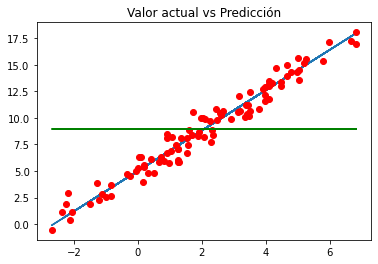

In [75]:
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],y_mean,'g')
plt.title('Valor actual vs Predicción')

In [76]:
data['SSR'] = (data['y_prediccion'] -  y_mean) ** 2
data['SSD'] = (data['y_prediccion'] - data['y_actual']) ** 2
data['SST'] = (data['y_actual'] - y_mean) ** 2

In [77]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.729804,6.281475,6.386628,6.433697,0.011057,6.978190
1,-0.830695,2.665240,3.421679,30.265648,0.572201,39.160840
2,1.536011,8.126412,7.918420,1.009385,0.043260,0.634715
3,-0.324104,4.709221,4.384203,20.601607,0.105637,17.756788
4,4.117845,13.463874,12.823906,15.216276,0.409558,20.618610


In [78]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR)
print(SSD)
print(SST)

1787.4811470768277
71.90717201446309
1791.2002755770798


In [79]:
SSR + SSD #tendría que ser igual a SST

1859.388319091291

In [80]:
R2 = SSR/SST
R2

0.9979236668557044

(array([ 2.,  1.,  9.,  8., 12., 22., 17., 11., 10.,  8.]),
 array([-2.29897194, -1.90318275, -1.50739355, -1.11160436, -0.71581517,
        -0.32002597,  0.07576322,  0.47155242,  0.86734161,  1.26313081,
         1.65892   ]),
 <a list of 10 Patch objects>)

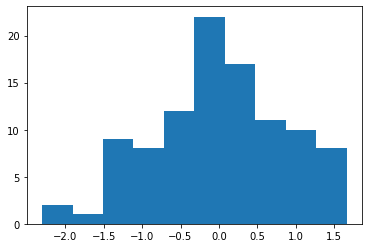

In [81]:
plt.hist(data['y_prediccion'] - data['y_actual'])

Obteniendo la recta de regresión a partir de los datos

y = a + b * x

b = covarianza / varianza

a = y_n - b * x_m

In [82]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(2.07330309789982, 8.923101769053797)

In [83]:
data['beta_numerador'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_denominador'] = (data['x'] - x_mean) ** 2
beta = sum(data['beta_numerador'])/ sum(data['beta_denominador'])
alpha = y_mean - beta * x_mean
alpha, beta

(5.05890621037109, 1.8637870953827234)

y = 5.151499121738837 + 1.9391305328769286 * x

Recordemos que el que habíamos supuesto al principio sera y = 5 + 1.9 * x

In [84]:
data['model'] = alpha + beta * data['x']
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,model
0,0.729804,6.281475,6.386628,6.433697,0.011057,6.978190,3.549022,1.804989,6.419106
1,-0.830695,2.665240,3.421679,30.265648,0.572201,39.160840,18.172820,8.433205,3.510667
2,1.536011,8.126412,7.918420,1.009385,0.043260,0.634715,0.428056,0.288683,7.921703
3,-0.324104,4.709221,4.384203,20.601607,0.105637,17.756788,10.102387,5.747561,4.454845
4,4.117845,13.463874,12.823906,15.216276,0.409558,20.618610,9.283801,4.180153,12.733693


In [85]:
SSR_model = sum((data['model'] -  y_mean) ** 2)
SSD_model = sum((data['model'] - data['y_actual']) ** 2)
SST_model = sum((data['y_actual'] - y_mean) ** 2)
R2 = SSR_model/SST_model
R2

0.9602324212544437

Text(0.5, 1.0, 'Valor actual vs Predicción')

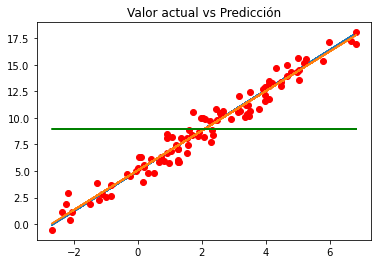

In [91]:
y_mean_array = [y_mean for i in range(0, len(data['x']))]
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],data['model'])
plt.plot(data['x'],y_mean_array,'g')
plt.title('Valor actual vs Predicción')